# Лабораторная работа №5

## Численное решение системы линейных уравнений, численное интегрирование

### Задание 1

*Вычислить  интеграл $ \ \int\limits_1^5 ln(10+i+e^{-i \cdot t})\,dt$, используя формулу Буля* 

In [1]:
import numpy as np
from scipy import *
from scipy.linalg import *
from math import log, exp,sin
import matplotlib.pyplot as plt
from time import time


Используем формулу Буля: $I = (7\cdot f(a)+32\cdot f(\frac{3a+b}{4})+12\cdot f(\frac{a+b}{2})+32\cdot f(\frac{a+3b}{4})+7\cdot f(b))\cdot \frac{b-a}{90}$, где $a$ и $b$ $-$ нижний и верхний пределы интегрирования соответственно. $(i=1)$

In [11]:
def f(x,k):
    z=log(10+(k+1)+exp(-(k+1)*x))
    return z

def I(y,k):
    z=0
    a=1
    b=5
    l=(b-a)/y
    for i in range(y):
        b0=a+l
        c=((7*f(a,k)+32*f((3*a+b0)/4,k)+12*f((a+b0)/2,k)+32*f((a+3*b0)/4,k)+7*f(b0,k)))*(b0-a)/90
        a=a+l
        z=z+c
    return z


### Задание 2

*Построить график подыинтегральной функции, а также график зависимости интеграла от номера итерации ($i=1$)*

График подынтегральной функции.

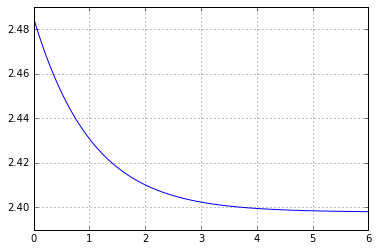

In [12]:
% matplotlib inline
xnew=np.linspace(0,6,1000)
ynew=[f(i,0) for i in xnew]
plt.plot(xnew,ynew)
plt.grid(True)
plt.show()

График зависимости значения интеграла от номера итерации $I(y)$ $(i=1)$

Значение интеграла: 9.624137311302906


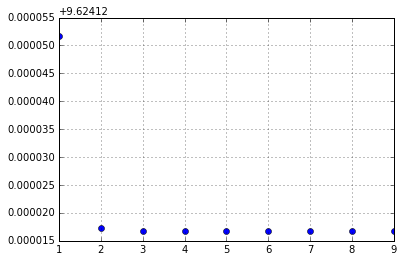

In [13]:
#y-номер итерации
y=1
s1=1
s0=2
while abs(s1-s0)>0.01:
    s0=I(y,0)
    s1=I(y+1,0)
    y=y+1
print("Значение интеграла:" ,s1)
x_y=[]
y_y=[]
for y in range(1,10):
    x_y.append(y)
    y_y.append(I(y,0))
plt.plot(x_y,y_y,'o')
plt.grid(True)
plt.show()


### Задание 3

*Вычислить интегралы с помощью функции $numpy.trapz(\ldots)$ и графически сравнить с результатоми, полученными с помощью фрмулы Буля *

Графическое сравнение значений интегралов

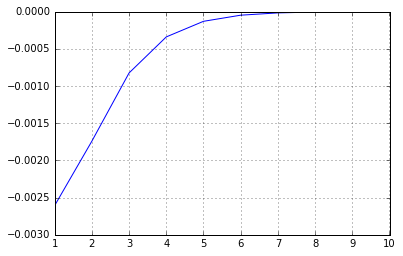

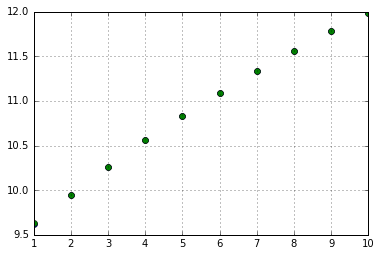

In [20]:
#n - количество интегралов
#k = i в исходной формуле, (k+1) - чтобы циклы с k=0

n=10
#Список значений интегралов, решенных методом Буля
xi=[]
yi=[] 
for k in range(0,n):
    s1=1
    s0=2
    y=1
    while abs(s1-s0)/s1>0.01:
        s0=I(y,k)
        s1=I(y+1,k)
        y=y+1 
    yi.append(s1)
    xi.append(k+1)
 
 #Список значений интегралов по trapz
yit=[]
yii=[]
for k in range(0,n):
    yt=[]
    xt=[]
    for i in range(1,6,1):
        xt.append(i)
        yt.append(f(i,k))
    st=np.trapz([yt],x=[xt])
    yit.append(-st+yi[k])
    yii.append(st)
plt.plot(xi,yit)
plt.grid(True)
plt.show() 
plt.plot(xi,yi,'o', xi,yii, 'o')
plt.grid(True)
plt.show()  

### Задание 4

*Решить систему уравнений методом релаксации с относительной точностью 0.001*

$n^3\cdot x_{i}=\sum_{j=1}^n \frac{1+j+j^2}{1+j+i^2}\cdot x_j + \int\limits_1^5 ln(10+i+e^{-i \cdot t})\,dt$, где $n$ - число уравнений системы ($n=1000$).

Дана система: $A\cdot x=b$. Для итерационного метода решения системы правило построения элементов итерационной последовательности имеет следующий вид: $x^{k+1}=T_k \cdot x^k + H_k \cdot b$, где $T_k=E-H_k \cdot A$, $H_k$ $-$ последовательность невырожденных матриц.

Метод релаксации заключается в том, что итерационный процесс имеет следующий вид в векторной форме: $x^{k+1}=(D+\tau \cdot L)^{-1} \cdot ((1-\tau)\cdot D)-\tau \cdot R)\cdot x^k+\tau \cdot(D+\tau \cdot L)^{-1}\cdot b$, где $D$ $-$ диагональная матрица, $L$ $-$ нижняя треугольная матрица с нулевыми диагональными элементами, $R$ $-$ верхняя треугольная матрица с нулевыми диагональными элементами, $b$ $-$ вектор-столбец правой части, $\tau$ $-$ некоторая константа. 

Видно, что $H_k =\tau \cdot(D+\tau \cdot L)^{-1}$ и $T_k =(D+\tau \cdot L)^{-1} \cdot ((1-\tau)\cdot D)-\tau \cdot R)$.

Выполнено: $L+D+R=A$.

В заданной системе $A$ $-$ матрица коэффициентов, $b$ $-$ вектор-столбец значений интегралов, $\tau = 0.9$ (нижняя релаксация).

In [15]:
np.set_printoptions( threshold=100,edgeitems=5)
n=1000
def fm(i,j):
    z=-(1+(j+1)+(j+1)**2)/(1+(j+1)+(i+1)**2)
    return z
A=np.fromfunction(fm, (n,n))
t1=time()
e=np.eye(n)
A=A+e*n**3
b= np.zeros((n, 1))
for k in range(0,n):
    s1=1
    s0=2
    i=1
    while abs(s1-s0)/s1>0.01:
        s0=I(i,k)
        s1=I(i+1,k)
        i=i+1 
    b[k][0]=s1
D=e*A
L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.9
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))
C=dot(H,b)
X0=np.zeros((n, 1))

while True:
    X1=dot(T,X0)+C
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
t2=time()
print("Время выполнения метода релаксации",t2-t1)
print(X1)
print(" ")
t1=time()
S=(solve(A,b))
t2=time()
print("Решение системы коамндой solv:")
print(S)
print("Время выполнения команды solv",t2-t1)

Время выполнения метода релаксации 0.5965464115142822
[[  9.63597217e-09]
 [  9.95698795e-09]
 [  1.02726735e-08]
 [  1.05679733e-08]
 [  1.08434875e-08]
 ..., 
 [  2.76521928e-08]
 [  2.76561665e-08]
 [  2.76601363e-08]
 [  2.76641022e-08]
 [  2.76680642e-08]]
 
Решение системы коамндой solv:
[[  9.63698211e-09]
 [  9.95802974e-09]
 [  1.02737465e-08]
 [  1.05690752e-08]
 [  1.08446164e-08]
 ..., 
 [  2.76549583e-08]
 [  2.76589324e-08]
 [  2.76629026e-08]
 [  2.76668689e-08]
 [  2.76708312e-08]]
Время выполнения команды solv 0.03127431869506836


### Задание 5

*Решить систему этим же методом для $n=10000$ *

In [16]:
n=10000
def fm(i,j):
    z=-(1+(j+1)+(j+1)**2)/(1+(j+1)+(i+1)**2)
    return z
A=np.fromfunction(fm, (n,n))
t1=time()
e=np.eye(n)
A=A+e*n**3
b= np.zeros((n, 1))
for k in range(0,n):
    s1=1
    s0=2
    i=1
    while abs(s1-s0)/s1>0.01:
        s0=I(i,k)
        s1=I(i+1,k)
        i=i+1 
    b[k][0]=s1

D=e*A
L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.9
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))
X0=np.zeros((n, 1))
C=dot(H,b)
while True:
    X1=dot(T,X0)+C
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
    
t2=time()
print("Время выполнения метода релаксации",t2-t1)
print(X1)
print(" ")
t1=time()
S=(solve(A,b))
t2=time()
print("Решение системы коамндой solv:")
print(S)
print("Время выполнения команды solv",t2-t1)



Время выполнения метода релаксации 750.6307184696198
[[  9.62491077e-12]
 [  9.94599527e-12]
 [  1.02617924e-11]
 [  1.05572428e-11]
 [  1.08329428e-11]
 ..., 
 [  3.68400765e-11]
 [  3.68404762e-11]
 [  3.68408759e-11]
 [  3.68412755e-11]
 [  3.68416751e-11]]
 
Решение системы коамндой solv:
[[  9.62587963e-12]
 [  9.94699623e-12]
 [  1.02628249e-11]
 [  1.05583049e-11]
 [  1.08340324e-11]
 ..., 
 [  3.68437609e-11]
 [  3.68441606e-11]
 [  3.68445603e-11]
 [  3.68449600e-11]
 [  3.68453596e-11]]
Время выполнения команды solv 48.91591811180115


### Задание 6

*Построить график решения $X(i)$, а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы *

График зависимости решения $X(i)$

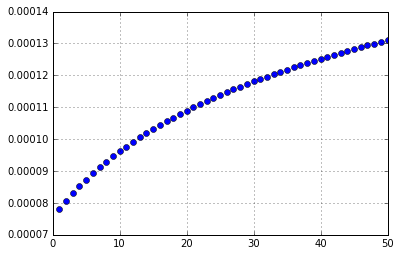

In [21]:
n=50
def fm(i,j):
    z=-(1+(j+1)+(j+1)**2)/(1+(j+1)+(i+1)**2)
    return z
A=np.fromfunction(fm, (n,n))
e=np.eye(n)
A=A+e*n**3
b= np.zeros((n, 1))
for k in range(0,n):
    s1=1
    s0=2
    i=1
    while abs(s1-s0)/s1>0.01:
        s0=I(i,k)
        s1=I(i+1,k)
        i=i+1 
    b[k][0]=s1

D=e*A
L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.9
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))
X0=np.zeros((n, 1))
C=dot(H,b)
while True:
    X1=dot(T,X0)+C
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
    
xx=np.linspace(1,n,n)
plt.plot(xx,X1,'o')
plt.grid(True)
plt.show()

График зависимости $||X||$$(y)$, $y$ $-$ номер итерации.

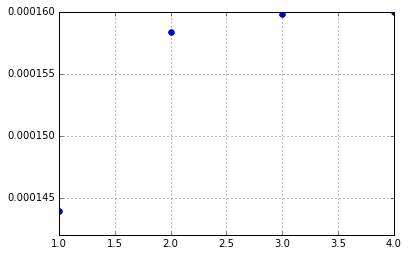

In [18]:
n=100
def fm(i,j):
    z=-(1+(j+1)+(j+1)**2)/(1+(j+1)+(i+1)**2)
    return z
A=np.fromfunction(fm, (n,n))
e=np.eye(n)
A=A+e*n**3


b= np.zeros((n, 1))
for k in range(0,n):
    s1=1
    s0=2
    i=1
    while abs(s1-s0)/s1>0.01:
        s0=I(i,k)
        s1=I(i+1,k)
        i=i+1 
    b[k][0]=s1


D=e*A
L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.9
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))
X0=np.zeros((n, 1))

while True:
    X1=dot(T,X0)+dot(H,b)
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
no=[]
it=[]
X0=np.zeros((n, 1))
y=1
while True:
    X1=dot(T,X0)+dot(H,b)
    no.append(norm(X1))
    it.append(y)
    y=y+1
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1
plt.plot(it,no,'o')
plt.grid(True)
plt.show()

### Задание 7

*Решить систему с использованием встроенной функции $numpy.linalg.solve(\ldots)$, результат графически сравнить с заданным методом*

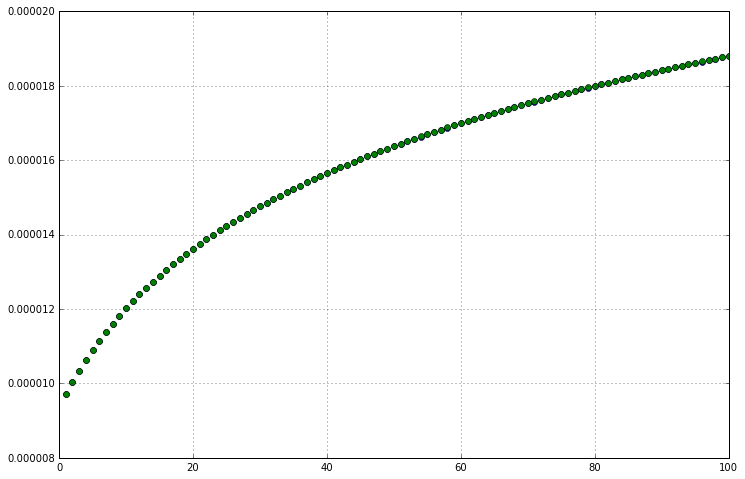

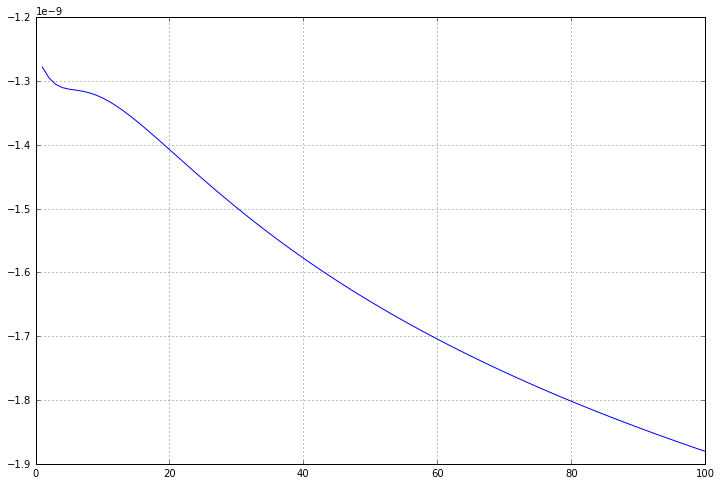

In [29]:
n=100
def fm(i,j):
    z=-(1+(j+1)+(j+1)**2)/(1+(j+1)+(i+1)**2)
    return z
A=np.fromfunction(fm, (n,n))
e=np.eye(n)
A=A+e*n**3

b= np.zeros((n, 1))
for k in range(0,n):
    s1=1
    s0=2
    i=1
    while abs(s1-s0)/s1>0.01:
        s0=I(i,k)
        s1=I(i+1,k)
        i=i+1 
    b[k][0]=s1


D=e*A
L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.9
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))
X0=np.zeros((n, 1))
C=dot(H,b)
while True:
    X1=dot(T,X0)+C
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
    
S=solve(A,b)
fig=plt.figure(figsize=(12,8))
xx=np.linspace(1,n,n)
plt.plot(xx,X1,'o',xx, S, 'o')
plt.grid(True)
plt.show()
fig=plt.figure(figsize=(12,8))
xx=np.linspace(1,n,n)
plt.plot(xx,X1-S)
plt.grid(True)
plt.show()

#### Выполнил Квашенников Дмитрий. 431 группа